In [2]:
import numpy as np
import operator
import matplotlib.pyplot as plt

def createDataSet():
    group = np.array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group, labels

In [3]:
group,labels = createDataSet()

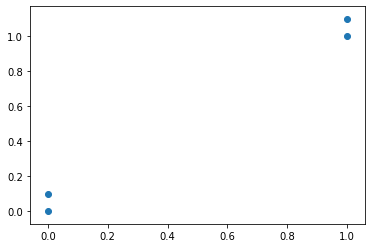

In [4]:
plt.scatter(group[:,0],group[:,1])
plt.show()

In [4]:
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = np.tile(inX, (dataSetSize,1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    sortedDistIndicies = distances.argsort()     
    classCount={}          
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]


In [5]:
classify0([0,0], group, labels, 3)


'B'

In [6]:
def file2matrix(filename):
    love_dictionary={'largeDoses':3, 'smallDoses':2, 'didntLike':1}
    fr = open(filename)
    arrayOLines = fr.readlines()
    numberOfLines = len(arrayOLines)            #get the number of lines in the file
    returnMat = np.zeros((numberOfLines,3))     #prepare matrix to return
    classLabelVector = []                       #prepare labels return   
    index = 0
    for line in arrayOLines:
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0:3]
        if(listFromLine[-1].isdigit()):
            classLabelVector.append(int(listFromLine[-1]))
        else:
            classLabelVector.append(love_dictionary.get(listFromLine[-1]))
        index += 1
    return returnMat,np.array(classLabelVector)

In [7]:
datingDataMat, datingLabels= file2matrix('datingTestSet2.txt')
datingDataMat

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

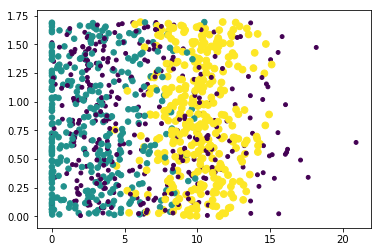

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:,1], datingDataMat[:,2], 15.0 * np.array(datingLabels), 15.0 * np.array(datingLabels))
plt.show()

In [9]:
def plot(x,y):
    label1 = np.where(y.ravel() == 1)
    plt.scatter(x[label1,0],x[label1,1],marker='x',color = 'r',label = 'didnt like=1')
    label2 = np.where(y.ravel() == 2)
    plt.scatter(x[label2,0],x[label2,1],marker='o',color = 'b',label = 'smallDoses=2')
    label3 = np.where(y.ravel() == 3)
    plt.scatter(x[label3,0],x[label3,1],marker='.',color = 'y',label = 'largeDoses=3')
    plt.xlabel('pilot distance')
    plt.ylabel('game time')
    plt.legend(loc = 'upper left')
    plt.show()

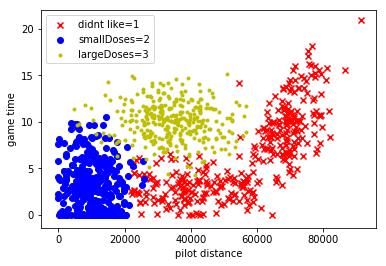

In [10]:
plot(datingDataMat, datingLabels)

In [11]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = np.zeros(np.shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - np.tile(minVals, (m,1))
    normDataSet = normDataSet/np.tile(ranges, (m,1))   #element wise divide
    return normDataSet, ranges, minVals

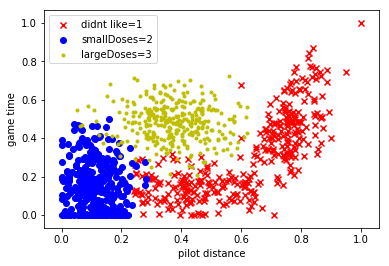

In [12]:
normDataSet, ranges, minVals = autoNorm(datingDataMat)
plot(normDataSet, datingLabels)

In [13]:
def datingClassTest():
    hoRatio = 0.10      #hold out 10%
    datingDataMat,datingLabels = file2matrix('datingTestSet2.txt')       #load data setfrom file
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m*hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],4)        
        if (classifierResult != datingLabels[i]): 
            print ("the classifier came back with: %d, the real answer is: %d"%(classifierResult, datingLabels[i]))
            errorCount += 1.0
    print("the total error rate is: %.1f%% and total error count is: %d" % (errorCount/float(numTestVecs)*100, errorCount))

In [14]:
datingClassTest()

the classifier came back with: 3, the real answer is: 1
the classifier came back with: 3, the real answer is: 1
the classifier came back with: 2, the real answer is: 3
the classifier came back with: 2, the real answer is: 1
the total error rate is: 4.0% and total error count is: 4


In [15]:
def classifyPerson():
    resultList = ['not at all', 'in small doses', 'in large doses']
    percentTats = float(input("percentage of time spent playing video games?"))
    ffMiles = float(input("frequent flier miles earned per year?"))
    iceCream = float(input("liters of ice cream consumed per year?"))
    datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    inArr = np.array([ffMiles, percentTats, iceCream, ])
    classifierResult = classify0((inArr - \
                                  minVals)/ranges, normMat, datingLabels, 3)
    print ("You will probably like this person: %s" % resultList[classifierResult - 1])
    

In [16]:
classifyPerson()

percentage of time spent playing video games?10000
frequent flier miles earned per year?10
liters of ice cream consumed per year?1
You will probably like this person: not at all


In [17]:
def img2vector(filename):
    returnVect = np.zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0,32*i+j] = int(lineStr[j])
    return returnVect

In [18]:
testVector = img2vector('testDigits/0_13.txt')
testVector[0,0:31]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
from os import listdir

In [20]:
def handwritingClassTest():
    hwLabels = []
    trainingFileList = listdir('trainingDigits')           #load the training set
    m = len(trainingFileList)
    trainingMat = np.zeros((m,1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]     #take off .txt
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        trainingMat[i,:] = img2vector('trainingDigits/%s' % fileNameStr)
    testFileList = listdir('testDigits')        #iterate through the test set
    errorCount = 0.0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]     #take off .txt
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector('testDigits/%s' % fileNameStr)
        classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 3)
        #print ("the classifier came back with: %d, the real answer is: %d" % (classifierResult, classNumStr))
        if (classifierResult != classNumStr):
            errorCount += 1.0
            print("+", end='')
        else:
            print("-", end='')
        if( i % 100 == 99):
            print("\n")        
    print ("\nthe total number of errors is: %d" % errorCount)
    print ("\nthe total error rate is: %.4f%%" % (errorCount/float(mTest)*100))

In [21]:
handwritingClassTest()

---------------------+------------------------------------------------------------------------------

---------------------------------------------------------+--+---------------------------------------

---------------------------------------------------------------------------------------------------+

----------------------------------------------------------------------------------------------------

------------------------------------------------------------+------------------+--------------------

------------------------------------------------------------------------------------------------+---

--------------------------------------------------+-------------------------------------+-----------

----------------------------------------------------------------------------------------------------

--------------------------------+-------------------------------------------------------------------

------------+---------------------------------
the total number of errors is: 11

